# SWIGGY SALES ANALYSIS

## Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

## Import Data

In [2]:
df = pd.read_excel("C:/Users/knigh/Downloads/swiggy_data.xlsx", engine="openpyxl")

In [3]:
df.sample(5)

,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
158069,Uttarakhand,Dehradun,2025-06-10,Starbucks Coffee,Malsi,Recommended,Blonde Cappuccino,230.00,4.4,0
62290,Madhya Pradesh,Indore,2025-04-10,Maa Ki Rasoi,Vijay Nagar,Chinese,Veg Manchurian,126.00,4.4,0
50850,Uttar Pradesh,Lucknow,2025-05-09,KFC,Gomti Nagar,EPIC VALUE MEALS FOR 1-2 (UP TO 22% OFF),Chicken Mingles Bucket,399.05,4.6,90
140915,Jharkhand,Ranchi,2025-04-11,"Faasos - Wraps, Rolls & Shawarma",Kokar,Newly Launched,Baked Paneer Tikka Pizza Wrap.,279.00,4.4,0
105742,Uttar Pradesh,Lucknow,2025-07-05,Shri Ganpati Misthan Bhandar,Vikas Nagar,Noodles,Paneer Noodle,150.00,3.7,38


In [4]:
df.tail()

,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
197425,Sikkim,Gangtok,2025-01-25,Mama's Kitchen,Gangtok,Momos,Soya cheese chilli momo ...,112.0,4.4,0
197426,Sikkim,Gangtok,2025-07-02,Mama's Kitchen,Gangtok,Momos,Kurkure momo fried ...,140.0,4.4,0
197427,Sikkim,Gangtok,2025-03-25,Mama's Kitchen,Gangtok,Momos,Chilli cheese momo,126.0,4.4,0
197428,Sikkim,Gangtok,2025-03-26,Mama's Kitchen,Gangtok,Momos,Veg Momos (8 Pc),85.0,4.4,0
197429,Sikkim,Gangtok,2025-03-27,Mama's Kitchen,Gangtok,Momos,Soya Momo,100.0,4.4,0


### Meta Data

In [5]:
print("No. of Rows: ", df.shape[0])

No. of Rows:  197430


In [6]:
print("No. of Filed: ", df.shape[1])

No. of Filed:  10


In [7]:
df.info

<bound method DataFrame.info of             State       City Order Date           Restaurant Name  \
0       Karnataka  Bengaluru 2025-06-29  Anand Sweets & Savouries   
1       Karnataka  Bengaluru 2025-04-03     Srinidhi Sagar Deluxe   
2       Karnataka  Bengaluru 2025-01-15     Srinidhi Sagar Deluxe   
3       Karnataka  Bengaluru 2025-04-17     Srinidhi Sagar Deluxe   
4       Karnataka  Bengaluru 2025-03-13     Srinidhi Sagar Deluxe   
...           ...        ...        ...                       ...   
197425     Sikkim    Gangtok 2025-01-25            Mama's Kitchen   
197426     Sikkim    Gangtok 2025-07-02            Mama's Kitchen   
197427     Sikkim    Gangtok 2025-03-25            Mama's Kitchen   
197428     Sikkim    Gangtok 2025-03-26            Mama's Kitchen   
197429     Sikkim    Gangtok 2025-03-27            Mama's Kitchen   

                    Location     Category  \
0       Rajarajeshwari Nagar        Snack   
1                    Kengeri  Recommended   
2   

### Data Types

In [8]:
df.dtypes

State                         str
City                          str
Order Date         datetime64[us]
Restaurant Name               str
Location                      str
Category                      str
Dish Name                     str
Price (INR)               float64
Rating                    float64
Rating Count                int64
dtype: object

In [9]:
df.describe()

,Order Date,Price (INR),Rating,Rating Count
count,197430,197430.000000,197430.000000,197430.000000
mean,2025-05-01 19:41:20.996809,268.512920,4.341582,28.321805
min,2025-01-01 00:00:00,0.950000,1.500000,0.000000
25%,2025-03-01 00:00:00,139.000000,4.300000,0.000000
50%,2025-05-02 00:00:00,229.000000,4.400000,2.000000
75%,2025-07-01 00:00:00,329.000000,4.500000,15.000000
max,2025-08-31 00:00:00,8000.000000,5.000000,999.000000
std,NaN,219.338363,0.422585,87.542593


## KPI's

### Total Sales

In [10]:
total_Sales = df["Price (INR)"].sum()
print(("Total Sales (INR): "), round(total_Sales))

Total Sales (INR):  53012506


### Average Rating

In [11]:
average_rating = df["Rating"].mean()
print(("Average Rating: "), round(average_rating,2))

Average Rating:  4.34


### Average Order Value

In [12]:
avg_order_value = df["Price (INR)"].mean()
print(("Average Order Values (INR): "), round(avg_order_value,2))

Average Order Values (INR):  268.51


### Rating Count

In [13]:
rating_count = df["Rating Count"].sum()
print(("Rating Count: "), round(rating_count,2))

Rating Count:  5591574


### Total Orders

In [14]:
total_orders = len(df)
print("Total_Orders: ", round(total_orders,2))

Total_Orders:  197430


## CHART Design

### Monthly Sales Trend

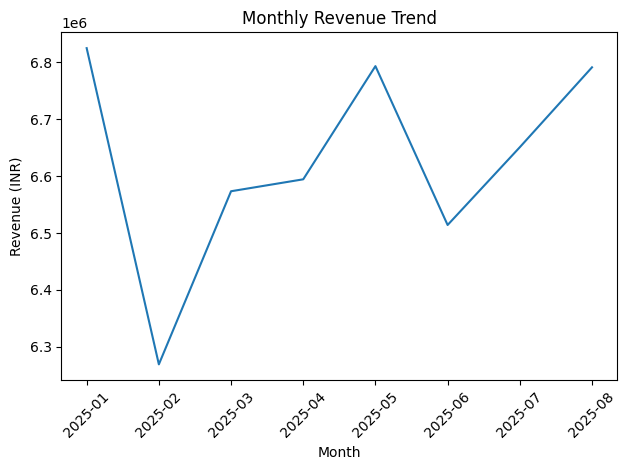

In [16]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

df["YearMonth"] = df["Order Date"].dt.to_period("M").astype(str)

monthly_revenue = df.groupby("YearMonth")["Price (INR)"].sum().reset_index()

plt.figure()
plt.plot(monthly_revenue["YearMonth"], monthly_revenue["Price (INR)"])
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Revenue (INR)")
plt.title("Monthly Revenue Trend")
plt.tight_layout()
plt.show()

### Daily Sales Trend

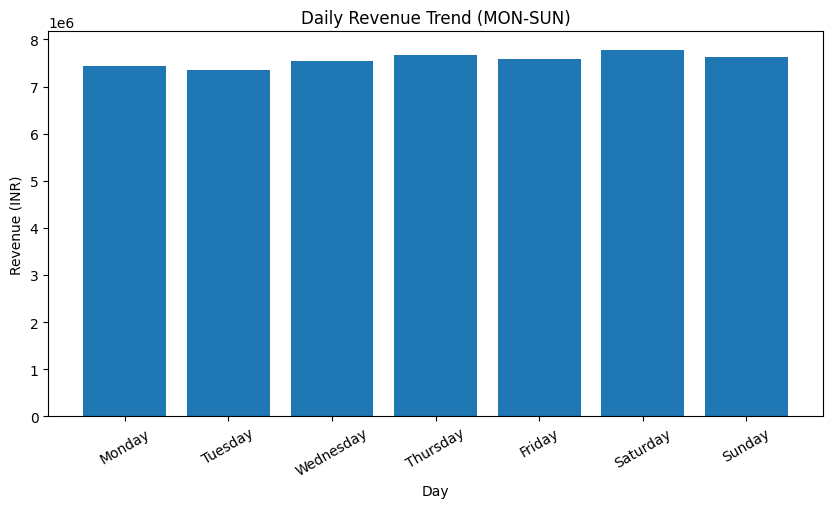

In [19]:
df["DayName"] = pd.to_datetime(df["Order Date"]).dt.day_name()

daily_revenue =(
    df.groupby("DayName")["Price (INR)"]
    .sum()
    .reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
)

plt.figure(figsize=(10,5))
plt.bar(daily_revenue.index, daily_revenue.values)
plt.title("Daily Revenue Trend (MON-SUN)")
plt.xlabel("Day")
plt.ylabel("Revenue (INR)")
plt.xticks(rotation= 30)

plt.show()

### Total Sales by Food Type (Veg vs Non-Veg)

In [32]:
import pandas as pd
import numpy as np

non_veg_keywords = [
    "chicken", "egg", "fish", "mutton", 
    "prawn", "biryani", "briyani", "kabab", "non-veg", "non veg"
]

df["Food Category"] = np.where(
    df["Dish Name"].str.lower().str.contains("|".join(non_veg_keywords), na=False),
    "Non-Veg",
    "Veg"
)

In [33]:
food_revenue =(
    df.groupby("Food Category")["Price (INR)"]
    .sum()
    .reset_index()
)

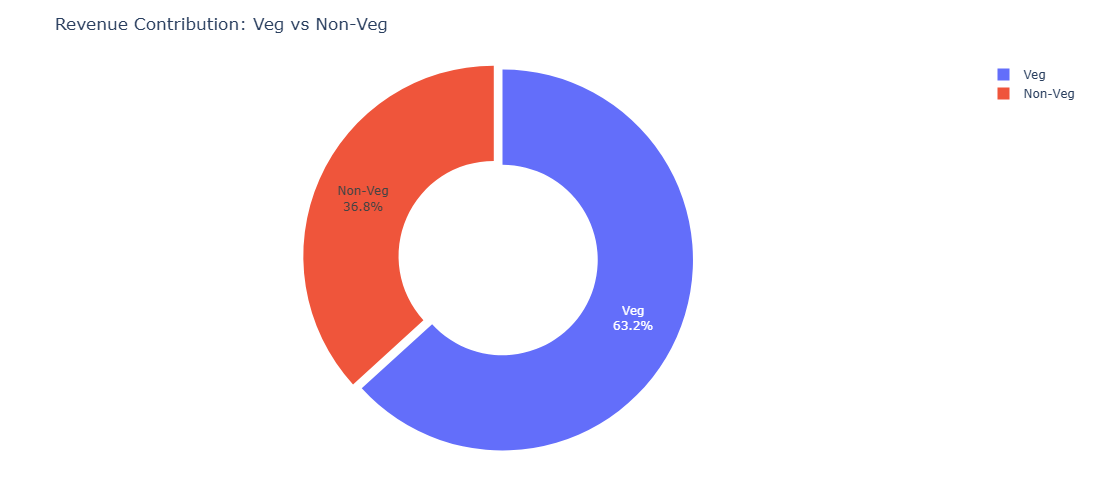

In [34]:
fig = px.pie(
    food_revenue,
    values="Price (INR)",
    names="Food Category",
    hole=0.5,
    title="Revenue Contribution: Veg vs Non-Veg"
)

fig.update_traces(
    textinfo = "percent + label",
    pull = [0.05,0]
)

fig.update_layout(
    height = 500,
    margin = dict(t=60, b=40, l=40, r=40)
)

fig.show()

### Total Sales by State

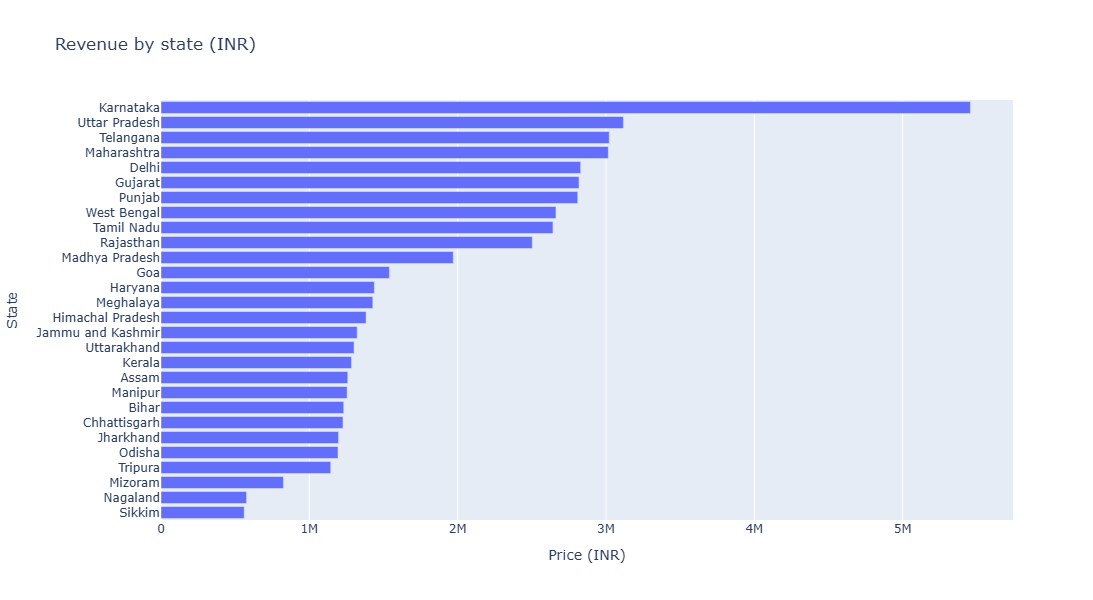

In [36]:
fig = px.bar(
    df.groupby("State", as_index=False)["Price (INR)"].sum()
     .sort_values("Price (INR)", ascending = False),
    x ="Price (INR)", 
    y = "State", 
    orientation="h",
    title="Revenue by state (INR)"
)

fig.update_layout(height=600, yaxis= dict(autorange="reversed"))
fig.show()

### Quarterly Performance Summary

In [37]:
df["Order_Date"] = pd.to_datetime(df["Order Date"])
df["Quarter"] = df["Order_Date"].dt.to_period("Q").astype(str)

quartely_summary =(
    df.groupby("Quarter", as_index=False)
    .agg(
        Total_Sales = ("Price (INR)", "sum"),
        Avg_Rating = ("Rating", "mean"),
        Total_Orders = ("Order_Date", "count")
    )
    .sort_values("Quarter")
)

quartely_summary["Total_Sales"] = quartely_summary["Total_Sales"].round(0)
quartely_summary["Avg_Rating"] = quartely_summary["Avg_Rating"].round(2)

quartely_summary

,Quarter,Total_Sales,Avg_Rating,Total_Orders
0,2025Q1,19667822.0,4.34,73096
1,2025Q2,19902257.0,4.34,74163
2,2025Q3,13442427.0,4.34,50171


### Top 5 Cities by Sales

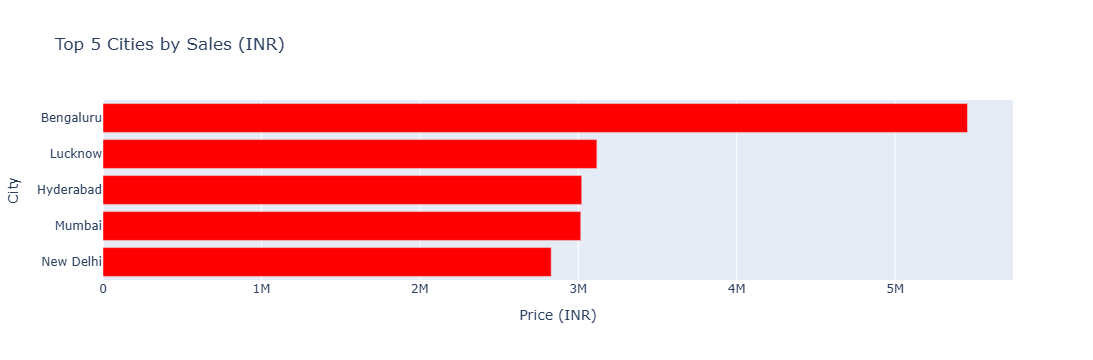

In [39]:
top_5_cities = (
    df.groupby("City")["Price (INR)"]
    .sum()
    .nlargest(5)
    .sort_values()
    .reset_index()
)

fig = px.bar(
    top_5_cities,
    x = "Price (INR)",
    y = "City", 
    orientation="h", 
    title="Top 5 Cities by Sales (INR)",
    color_discrete_sequence = ["red"]
)

fig.show()

### Weekly Trend Analysis

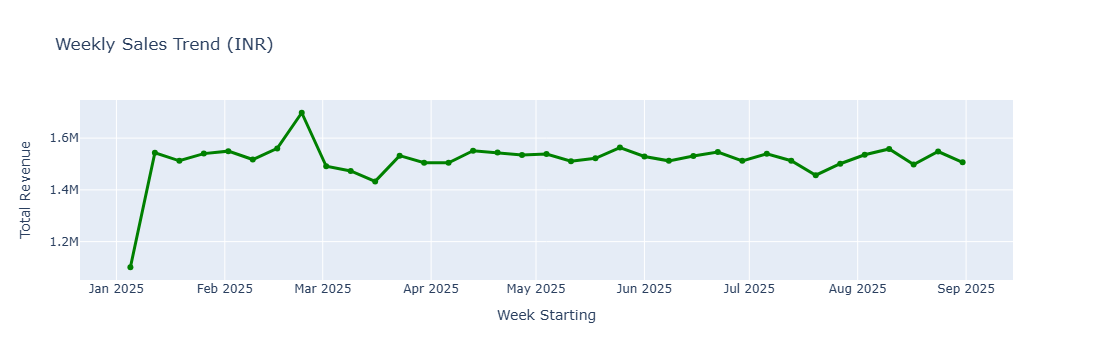

,Order_Date,Weekly_Sales,Order_Count
34,2025-08-31,1506676.78,5578
33,2025-08-24,1548112.71,5747
32,2025-08-17,1497733.59,5648
31,2025-08-10,1558098.72,5750
30,2025-08-03,1535617.47,5706


In [40]:
import plotly.express as px

weekly_trend = (
    df.groupby(pd.Grouper(key="Order_Date", freq="W"))
    .agg(
        Weekly_Sales = ("Price (INR)", "sum"),
        Order_Count = ("Order_Date", "count")
    )
    .reset_index()
)

# 2. Visualize the trend w
fig = px.line(
    weekly_trend, 
    x="Order_Date", 
    y="Weekly_Sales",
    title="Weekly Sales Trend (INR)",
    markers=True,
    labels={"Order_Date": "Week Starting", "Weekly_Sales": "Total Revenue"}
)

# Add a trendline/formatting
fig.update_traces(line_color="green", line_width=3)
fig.show()

# Display the data table
weekly_trend.sort_values("Order_Date", ascending=False).head()